#### Importing the libraries

In [1]:
import numpy as np
import warnings
from scipy import stats
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Read data and get the necessary information

In [2]:
data=pd.read_csv("data/scraped/all_data_scraped.csv")
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,legitimate
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\n\nThe requested ...,no_brand,phishing
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,legitimate
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,phishing
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,legitimate
...,...,...,...,...,...,...,...
4718,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\n\nThe requested URL was not found o...,no_brand,phishing
4719,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\n\nLooks like you've followed a...,no_brand,phishing
4720,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\n\nDoujinshi\n\nDorei wo Ch...,no_brand,legitimate
4721,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,phishing


In [3]:
data.shape

(4723, 7)

In [4]:
data.describe()

,red,green,blue
count,4723.000000,4723.000000,4723.000000
mean,224.683040,224.892653,225.974381
std,68.854573,67.889976,65.673415
min,0.000000,0.000000,0.000000
25%,247.000000,247.000000,246.000000
50%,254.000000,254.000000,254.000000
75%,254.000000,254.000000,254.000000
max,255.000000,255.000000,255.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   URL         4723 non-null   object 
 1   red         4723 non-null   float64
 2   green       4723 non-null   float64
 3   blue        4723 non-null   float64
 4   text        4364 non-null   object 
 5   brand_name  4723 non-null   object 
 6   status      4723 non-null   object 
dtypes: float64(3), object(4)
memory usage: 258.4+ KB


#### Null values

In [6]:
data.isnull().any()

URL           False
red           False
green         False
blue          False
text           True
brand_name    False
status        False
dtype: bool

In [7]:
data.isnull().sum()

URL             0
red             0
green           0
blue            0
text          359
brand_name      0
status          0
dtype: int64

In [8]:
#removing null values
data=data.dropna().reset_index(drop=True)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,legitimate
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\n\nThe requested ...,no_brand,phishing
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,legitimate
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,phishing
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,legitimate
...,...,...,...,...,...,...,...
4359,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\n\nThe requested URL was not found o...,no_brand,phishing
4360,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\n\nLooks like you've followed a...,no_brand,phishing
4361,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\n\nDoujinshi\n\nDorei wo Ch...,no_brand,legitimate
4362,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,phishing


In [9]:
data.shape

(4364, 7)

#### converting class labels into 0's and 1's

In [10]:
data['status']=np.where(data['status']=="legitimate",0,1)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\n\nThe requested ...,no_brand,1
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,1
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
...,...,...,...,...,...,...,...
4359,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\n\nThe requested URL was not found o...,no_brand,1
4360,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\n\nLooks like you've followed a...,no_brand,1
4361,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\n\nDoujinshi\n\nDorei wo Ch...,no_brand,0
4362,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1


#### class distribution

In [11]:
data['status'].value_counts()

1    2353
0    2011
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

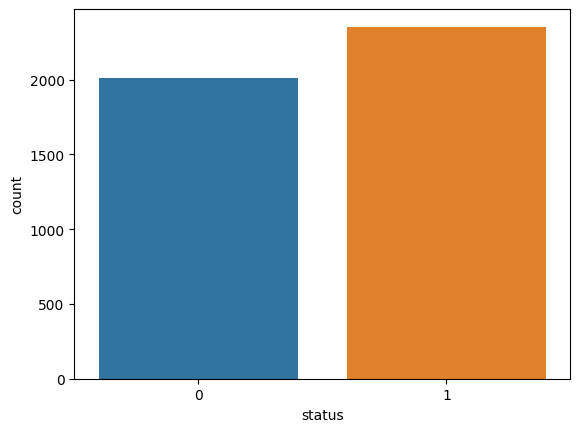

In [12]:
sns.countplot(x=data['status'])

#### total unique values for each feature
Total unique values in red, green and blue being around 200, out of 4364 rows, might tell us something about its influence on the target.

In [13]:
data.nunique(axis=0,dropna=True)

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

#### duplicated rows
Notice that the number of unique URL's are not 4364, which means there is a copy of one URL.

In [14]:
url_dup=data[data.duplicated()]

In [15]:
url_dup

,URL,red,green,blue,text,brand_name,status
1452,http://e710z0ear.du.r.appspot.com/c:/users/use...,254.0,254.0,254.0,Error: Page not found\n\nThe requested URL was...,no_brand,1


In [16]:
u=url_dup['URL']
u

1452    http://e710z0ear.du.r.appspot.com/c:/users/use...
Name: URL, dtype: object

In [17]:
data=data.drop_duplicates(keep='first').reset_index(drop=True)
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,30.0,32.0,37.0,Resource not found Error 404\n\nThe requested ...,no_brand,1
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,1
4,http://seanorr.tumblr.com,253.0,253.0,240.0,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
...,...,...,...,...,...,...,...
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\n\nThe requested URL was not found o...,no_brand,1
4359,http://frosty-nobel-ca7f68.netlify.app/,52.0,55.0,59.0,Site Not Found\n\nLooks like you've followed a...,no_brand,1
4360,https://hentaifox.com,26.0,25.0,25.0,Ge Random Parodies\n\nDoujinshi\n\nDorei wo Ch...,no_brand,0
4361,http://secureupdate.appleld.com.duilawyeryork....,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1


In [18]:
data.nunique(axis=0,dropna=True)

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

#### exploring with the rgb features and scaling the colors by a factor of 255

In [19]:
# print(data['red'].value_counts(254))
(data['red']==254).value_counts()

True     2445
False    1918
Name: red, dtype: int64

In [20]:
c_254=data.loc[(data['red']==254) & (data['blue']==254) & (data['green']==254)]
c_254

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,254.0,254.0,254.0,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
2,http://www.destroyalllines.com/,254.0,254.0,254.0,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,254.0,254.0,254.0,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,1
6,http://superbahisgirisadresimiz3.blogspot.com,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1
7,http://paypal-verification.applmanager.com/cus...,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1
...,...,...,...,...,...,...,...
4354,https://en.m.wikipedia.org/wiki/Closed-source,254.0,254.0,254.0,= WIKIPEDIA Q Search Wikipedia\n\nProprietary ...,no_brand,0
4355,https://steancommuhity.ru/profiles/7656224898287,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1
4356,http://het-impp11.com/servi-mail-pro-webb11192...,254.0,254.0,254.0,Your connection is not private\n\nAttackers mi...,no_brand,1
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,254.0,254.0,254.0,Not Found\n\nThe requested URL was not found o...,no_brand,1


In [21]:
c_253=data.loc[(data['red']==253) & (data['blue']==253) & (data['green']==253)]
c_253

,URL,red,green,blue,text,brand_name,status
14,https://duosecurity.com,253.0,253.0,253.0,stftenfae\ncisco\n\n» wo Product Editions & Pr...,no_brand,0
57,http://www.tesdaonline.info/,253.0,253.0,253.0,: we\nTESDA Scholarship Alert Ne\n\nRE TANG TA...,no_brand,0
69,https://en.wikipedia.org/wiki/Router_table_(wo...,253.0,253.0,253.0,WIKIPEDIA\n\nThe Free Encyclopedia\n\nContents...,no_brand,0
126,http://professorclaudineicamolesi.blogspot.com/,253.0,253.0,253.0,More ¥\n\nArmazem da Lingua Portug!\n\nO Blog ...,no_brand,0
142,http://www.helix-institute.com/,253.0,253.0,253.0,‘foundation\n\n=\n. roy a\nMicroSave Dea guys....,no_brand,0
...,...,...,...,...,...,...,...
4288,https://www.craftbeer.com/styles/session-beer,253.0,253.0,253.0,a\nBEERC/COM BEER BREWERIES FOOD NEWS Q FOLLOW...,no_brand,0
4303,http://www.nchsoftware.com/classic/index.html,253.0,253.0,253.0,NCH Software\nHome Download Screenshots Suppor...,no_brand,0
4325,http://attention.solution.valid.clearpointsupp...,253.0,253.0,253.0,This Account has been suspended.\n\nContact yo...,no_brand,1
4343,http://arrowsurfandsport.com/jcroofinginc/jcro...,253.0,253.0,253.0,This Account has been suspended.\n\nContact yo...,no_brand,1


#### Scaling of the colors

In [22]:
for i in range(len(data['red'])):
    data['red'][i] = data['red'][i] / 255
for i in range(len(data['green'])):
    data['green'][i] = data['green'][i] / 255
for i in range(len(data['blue'])):
    data['blue'][i] = data['blue'][i] / 255

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_8429/4133713521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['red'][i] = data['red'][i] / 255
/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_8429/4133713521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['green'][i] = data['green'][i] / 255
/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_8429/4133713521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [23]:
data

,URL,red,green,blue,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://shatorupa.com/receipe/micro/adobe/,0.117647,0.125490,0.145098,Resource not found Error 404\n\nThe requested ...,no_brand,1
2,http://www.destroyalllines.com/,0.996078,0.996078,0.996078,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,no_brand,0
3,http://www.east38.com/content/102/shippingdoc....,0.996078,0.996078,0.996078,HugeDomains.. oT scorch RR\n\nHome | FAQs | Ab...,no_brand,1
4,http://seanorr.tumblr.com,0.992157,0.992157,0.941176,"Don't, Dad.\n\nI cannot wait for a mediaeval c...",no_brand,0
...,...,...,...,...,...,...,...
4358,http://www.consultax.cl/thecrowngroup/tcwoodin...,0.996078,0.996078,0.996078,Not Found\n\nThe requested URL was not found o...,no_brand,1
4359,http://frosty-nobel-ca7f68.netlify.app/,0.203922,0.215686,0.231373,Site Not Found\n\nLooks like you've followed a...,no_brand,1
4360,https://hentaifox.com,0.101961,0.098039,0.098039,Ge Random Parodies\n\nDoujinshi\n\nDorei wo Ch...,no_brand,0
4361,http://secureupdate.appleld.com.duilawyeryork....,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1


### Work with the 'text' feature

#### Getting the general idea of the type of texts we will be dealing with, since the total unique values in dataset for 'text' is NOT the total rows. Which says that it needs some work.

In [24]:
c_253['text'][4362]

"This website uses cookies to ensure you get the best experience on our website. Learn more\n\nHOME START GROW ARTICLES PRODUCTS DEALS FREEBIES CONTACT\n\nSearch Engine Optimization for\nPhotographers — SEO Basics\n\nLAST UPDATED ON JULY 3, 2020 BY ZACH PREZ\n\n** This post contains affiliate links and | will be compensated if\nyou make a purchase after clicking through my links. As an\nAmazon Associate | earn from qualifying purchases.\n\nOpinions expressed are based on the Author's own\nexperience.\n\n—  . ° ill —_\n\nGUIDES\n\nClick to learn more:\n\nSEO Cookbook for Photographers\n\nBusiness Planning Cookbook\n\nPerfect Facebook Ads\n\nHow to Start a Photography Business"

In [25]:
data.nunique()

URL           4363
red            203
green          204
blue           216
text          3357
brand_name       9
status           2
dtype: int64

In [26]:
data['text'].value_counts()

Error: Page not found\n\nThe requested URL was not found on this server.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   129
Your connection is not private\n\nAttackers might be trying to steal your information from support-\nappleld.com.secureupdate.duilawyeryork.com (for exam

In [27]:
# created a dataframe to make it look cleaner
ty=pd.DataFrame(data=data['text'].value_counts().sort_values(ascending=False))

In [28]:
# counts=1 means that the web page scraped might be valid and working. so removing those
ty=ty.loc[ty['text'] != 1]

#### Removing texts with counts more than 1. This has been analysed thoroughly, and they really are different types of errors only.

In [29]:
rem_index = []
for i in range(len(ty)):
    common_loc = data.loc[data['text'] == ty.index[i]]
    for j in range(len(data)):
        if data['text'][j] == ty.index[i]:
            rem_index.append(j)
    del common_loc 
len(rem_index)

1258

In [30]:
data=data.drop(labels=rem_index,axis=0)
data=data.reset_index(drop=True)

In [31]:
data.nunique()

URL           3105
red            201
green          202
blue           212
text          3105
brand_name       9
status           2
dtype: int64

#### Removing texts with error messages.

In [32]:
bad_pages = []
bad_pattern = r"Site Not Found|This page isn’t working|Internal Server Error|This page isn’t working|Your connection is not private|404"
for i in range(len(data)):
    if re.match(bad_pattern, data['text'][i], flags=re.IGNORECASE):
        bad_pages.append(i)
bad_pages

[4,
 5,
 7,
 8,
 15,
 21,
 37,
 62,
 67,
 69,
 82,
 86,
 90,
 94,
 101,
 102,
 106,
 111,
 112,
 116,
 123,
 126,
 134,
 135,
 136,
 138,
 156,
 164,
 168,
 179,
 184,
 186,
 189,
 191,
 194,
 196,
 198,
 200,
 202,
 210,
 211,
 213,
 214,
 221,
 227,
 234,
 238,
 243,
 244,
 251,
 254,
 256,
 267,
 272,
 281,
 291,
 294,
 296,
 299,
 300,
 301,
 306,
 309,
 320,
 323,
 324,
 325,
 330,
 335,
 340,
 342,
 357,
 369,
 371,
 386,
 387,
 395,
 402,
 404,
 407,
 410,
 415,
 418,
 423,
 424,
 431,
 440,
 445,
 453,
 454,
 455,
 457,
 460,
 474,
 476,
 479,
 480,
 483,
 489,
 493,
 494,
 508,
 519,
 521,
 533,
 536,
 544,
 545,
 548,
 549,
 553,
 558,
 573,
 578,
 592,
 596,
 602,
 606,
 608,
 610,
 611,
 618,
 622,
 628,
 630,
 633,
 636,
 652,
 664,
 665,
 666,
 688,
 705,
 710,
 711,
 722,
 724,
 728,
 730,
 737,
 739,
 750,
 762,
 765,
 768,
 770,
 781,
 784,
 786,
 799,
 805,
 808,
 824,
 836,
 837,
 845,
 847,
 858,
 863,
 865,
 882,
 883,
 886,
 891,
 892,
 899,
 921,
 925,
 931,
 935

In [33]:
temp = data[data.index.isin(bad_pages)]
temp

,URL,red,green,blue,text,brand_name,status
4,http://app-okeefe382hania.ivspcrjvuy-95m32219l...,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
5,http://peparena.world/New1,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
7,http://copyright-teamhelp.com/username.php,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
8,https://www.toppro10.com/,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,0
15,http://cbango.com.ar/img/,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
...,...,...,...,...,...,...,...
3089,https://prth.talkincat.com/tz?jk=ZH9wlG9ma2Kcl...,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
3097,https://onelink.me,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,0
3098,http://secppal.xyz/,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1
3101,https://steancommuhity.ru/profiles/7656224898287,0.996078,0.996078,0.996078,Your connection is not private\n\nAttackers mi...,no_brand,1


In [34]:
temp = temp.reset_index(drop=True)

In [35]:
# Just for info. There indeed is a url with apple as a brand name.
(temp['brand_name']).value_counts()

no_brand    619
Name: brand_name, dtype: int64

In [36]:
data=data.drop(labels=bad_pages,axis=0)
data=data.reset_index(drop=True)

In [37]:
data.shape

(2486, 7)

### Label Balance after removing some failed pages

<AxesSubplot: xlabel='status', ylabel='count'>

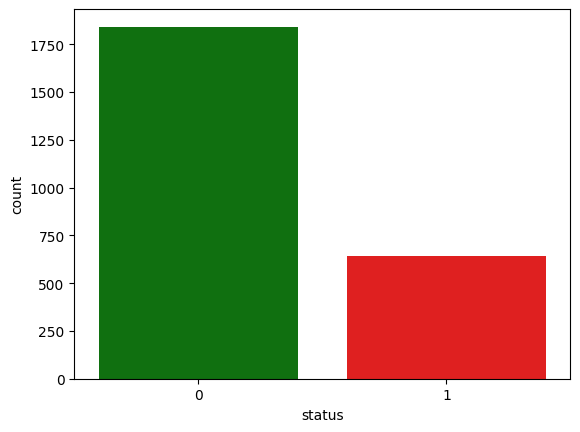

In [38]:
sns.countplot(x=data['status'], palette=['green', 'red'])

### Exploring brand_names col

In [39]:
data['brand_name'].value_counts()

no_brand     2409
Microsoft      43
Amazon         13
Apple          13
AT&T            3
Netflix         2
Zoom            1
Xerox           1
Linkedin        1
Name: brand_name, dtype: int64

In [40]:
# looks like there might be some use of this column

In [41]:
one_hot = pd.get_dummies(data.brand_name)

In [42]:
one_hot.head(1)

,AT&T,Amazon,Apple,Linkedin,Microsoft,Netflix,Xerox,Zoom,no_brand
0,0,0,0,0,0,0,0,0,1


Adding one hot back to df

In [43]:
data = pd.concat([data, one_hot], axis=1)

In [44]:
data.head(1)

,URL,red,green,blue,text,brand_name,status,AT&T,Amazon,Apple,Linkedin,Microsoft,Netflix,Xerox,Zoom,no_brand
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0,0,0,0,0,0,0,0,0,1


Dropping brand_name col since it is now one hot encoded, dropping no_brand column for redudancy, since 0 on all other brands means no_brand

In [45]:
data = data.drop(['brand_name', 'no_brand'], axis=1)

In [46]:
data.head(1)

,URL,red,green,blue,text,status,AT&T,Amazon,Apple,Linkedin,Microsoft,Netflix,Xerox,Zoom
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,0,0,0,0,0,0,0,0,0


### Exploring new features based on URL

In [47]:
from urllib.parse import urlparse

def get_top_level_domain(url):
    tld = urlparse(url)
    return tld.netloc
    
tester = get_top_level_domain('http://daniel.com/wp-content/themes/theretailer/inc/addons/login/customer_center/customer-IDPP00C672/myaccount/signin/?country.x=LU&amp;locale.x=en_LU')

In [48]:
# new feature candidate 1
def get_url_len(url_str):
    return len(url_str)

In [49]:
get_url_len(tester)

10

In [50]:
# new feature candidate 2: Character sequence probability
# This is done using a character bigram model
# tried to make this self documenting
import nltk
import math

def get_english_char_bigram_probs():
    words = nltk.corpus.words.words('en') # loading in a corpus of words
    bg_cnts = {}
    ung_cnts = {}
    # going through each word in the corpus
    for word in words:
        padding = ' ' # needed for bigram models
        word = padding + word.lower() + padding
        # getting characters
        chars = [c for c in word]
        bgs = nltk.bigrams(chars) # getting bigrams
        
        # adding bigram to counts dictionary
        for bigram in bgs:
            bg_cnts[bigram] = bg_cnts[bigram] + 1 if bigram in bg_cnts else 1
            
        #adding unigram to count dictionary
        for unigram in chars:
            ung_cnts[unigram] = ung_cnts[unigram] + 1 if unigram in ung_cnts else 1
    
    # turning each count into a probability (MLE)
    for k, v in bg_cnts.items():
        first_word, _ = k
        denom = ung_cnts[first_word]
        bg_cnts[k] = v/denom # now it is a conditional probability
        
    # same for unigrams
    norm = sum(ung_cnts.values())
    for k, v in ung_cnts.items():
        ung_cnts[k] = v/norm

    return bg_cnts, ung_cnts
    
bg_probs, ung_probs = get_english_char_bigram_probs()
bg_probs[('e', 'n')] # for example 

0.10653080129689671

In [51]:
def get_score(ung_probs, bg_probs, url_str):
    url_chars = [c for c in url_str]
    url_bgs = nltk.bigrams(url_chars)
    
    # getting a score of each url char bigram
    score = 0
    for bigram in url_bgs:
        # using linear interpolatation smoothing in negative log space to prevent underflow (lambda 0.5)
        first_word, _ = bigram
        score += 0.5*bg_probs.get(bigram, 0) + 0.5*ung_probs.get(first_word, 0)
        # TODO probably should do entropy here
    return score
get_score(ung_probs, bg_probs, tester)

0.5483671288246614

In [52]:
bg_probs, ung_probs = get_english_char_bigram_probs()

url_lens = []
url_scores = []
for url in data['URL']:
    tld = get_top_level_domain(url)
    l = get_url_len(tld)
    score = get_score(ung_probs, bg_probs, tld)
    url_lens.append(l)
    url_scores.append(score)

In [53]:
# adding new features to data
data['url_len'] = url_lens
data['tld_char_score'] = url_scores

In [54]:
data.head(2)

,URL,red,green,blue,text,status,AT&T,Amazon,Apple,Linkedin,Microsoft,Netflix,Xerox,Zoom,url_len,tld_char_score
0,http://www.softpedia.com/get/System/File-Manag...,0.996078,0.996078,0.996078,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,0,0,0,0,0,0,0,0,0,17,0.683042
1,http://www.destroyalllines.com/,0.996078,0.996078,0.996078,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH TE...,0,0,0,0,0,0,0,0,0,23,1.388078


In [55]:
# splitting for corr checking

In [56]:
y = data['status']
X = data.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Checking correlations between features

In [57]:
abs(X_train.corr())

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_8429/3642790581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corr())


,red,green,blue,AT&T,Amazon,Apple,Linkedin,Microsoft,Netflix,Xerox,Zoom,url_len,tld_char_score
red,1.000000,0.983677,0.939202,0.016541,0.005334,0.007492,0.011437,0.041532,0.011437,0.011693,0.011437,0.092844,0.078886
green,0.983677,1.000000,0.970805,0.016587,0.006154,0.007097,0.011465,0.042622,0.011465,0.011726,0.011465,0.092494,0.079463
blue,0.939202,0.970805,1.000000,0.016475,0.005177,0.006137,0.011105,0.045507,0.011376,0.011647,0.011376,0.081266,0.071330
AT&T,0.016541,0.016587,0.016475,1.000000,0.002287,0.001676,0.000633,0.003879,0.000633,0.000633,0.000633,0.003048,0.003985
Amazon,0.005334,0.006154,0.005177,0.002287,1.000000,0.004284,0.001617,0.009915,0.001617,0.001617,0.001617,0.022391,0.010538
Apple,0.007492,0.007097,0.006137,0.001676,0.004284,1.000000,0.001185,0.007266,0.001185,0.001185,0.001185,0.011670,0.008910
Linkedin,0.011437,0.011465,0.011105,0.000633,0.001617,0.001185,1.000000,0.002743,0.000447,0.000447,0.000447,0.010031,0.009427
Microsoft,0.041532,0.042622,0.045507,0.003879,0.009915,0.007266,0.002743,1.000000,0.002743,0.002743,0.002743,0.059450,0.024287
Netflix,0.011437,0.011465,0.011376,0.000633,0.001617,0.001185,0.000447,0.002743,1.000000,0.000447,0.000447,0.007405,0.002140
Xerox,0.011693,0.011726,0.011647,0.000633,0.001617,0.001185,0.000447,0.002743,0.000447,1.000000,0.000447,0.010972,0.002296


In [58]:
# All the colors seem highly correleated, URL features are too

Checking correleation with target (training data)

In [59]:
abs(X_train.corrwith(y_train))

/var/folders/zc/g0w96sh55bq1w03tz36mmk940000gn/T/ipykernel_8429/2725760261.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corrwith(y_train))


red               0.103828
green             0.099025
blue              0.098318
AT&T              0.016551
Amazon            0.045075
Apple             0.003558
Linkedin          0.012468
Microsoft         0.027691
Netflix           0.012468
Xerox             0.012468
Zoom              0.012468
url_len           0.251840
tld_char_score    0.221507
dtype: float64

In [60]:
# Colors definitely matter more than brand names